In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "data/Mouse_metadata.csv"
clinical_trial = "data/Study_results.csv"

In [17]:
## Read the Mouse and Drug Data and the Clinical Trial Data

drug_df = pd.read_csv(mouse_drug)
drug_df.head
trial_df = pd.read_csv(clinical_trial)
print(drug_df.head())
print(trial_df.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [18]:
### Combine the data
merge_df = pd.merge(trial_df, drug_df, on="Mouse ID", how="left")
print(merge_df.head())

dropdupes_df = merge_df[["Mouse ID", "Timepoint"]].drop_duplicates(keep='first')
print(dropdupes_df.head())
dropdupes_df.count()

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  
  Mouse ID  Timepoint
0     b128          0
1     f932          0
2     g107          0
3     a457          0
4     c819          0


Mouse ID     1888
Timepoint    1888
dtype: int64

In [ ]:
## Tumor Response to Treatment

In [22]:
##### Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumorgroup = merge_df[["Tumor Volume (mm3)","Drug Regimen", "Timepoint"]].groupby(["Drug Regimen", "Timepoint"])
meantumormean = meantumorgroup.mean()
print(meantumormean.head())

# Convert to DataFrame
meantumormean_df = pd.DataFrame(meantumormean).reset_index()

# Preview DataFrame
meantumormean_df.head()

                        Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325


,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sterrogroup = merge_df[["Tumor Volume (mm3)","Drug Regimen", "Timepoint"]].groupby(["Drug Regimen", "Timepoint"]).sem()
sterrogroup.head()

# Convert to DataFrame
sterrogroup_df = pd.DataFrame(sterrogroup).reset_index()

meanssterrogroup = sterrogroup_df.mean()
print(sterrogroup.mean())

# Preview DataFrame
sterrogroup


Tumor Volume (mm3)    0.696525
dtype: float64


Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731
...                                    ...
Zoniferol    25                   0.602513
             30                   0.800043
             35                   0.881426
             40                   0.998515
             45                   1.003576

[100 rows x 1 columns]

In [24]:
#Re-Format the Data Frames
meantumorgrouppivot = meantumormean_df.pivot(index='Timepoint', columns='Drug Regimen', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
meantumorgrouppivot.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [25]:
# pivot standard error to be in the same format as other set
sterrogroupssepivot = sterrogroup_df.pivot(index='Timepoint', columns='Drug Regimen', values='Tumor Volume (mm3)')
# Preview DataFrame
sterrogroupssepivot.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


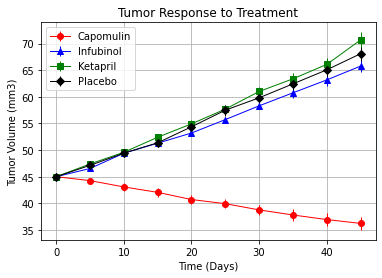

In [29]:
# Generate the Plot (with Error Bars)
plt.errorbar(meantumorgrouppivot.index, meantumorgrouppivot["Capomulin"], 
                          yerr=sterrogroupssepivot["Capomulin"], marker="o",color="red", linewidth=1, label="Capomulin")
plt.errorbar(meantumorgrouppivot.index, meantumorgrouppivot["Infubinol"], 
                          yerr=sterrogroupssepivot["Infubinol"], marker="^",color="blue", linewidth=1, label="Infubinol")
plt.errorbar(meantumorgrouppivot.index, meantumorgrouppivot["Ketapril"], 
                         yerr=sterrogroupssepivot["Ketapril"], marker="s",color="green", linewidth=1, label="Ketapril")
plt.errorbar(meantumorgrouppivot.index, meantumorgrouppivot["Placebo"], 
                        yerr=sterrogroupssepivot["Placebo"], marker="D",color="black", linewidth=1, label="Placebo")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")                                                 
plt.grid(True)
plt.legend(loc="best")
plt.savefig("Tumor Response to Treatment")
plt.show()

## Metastatic Response to Treatment

In [35]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanmet = merge_df[["Metastatic Sites","Drug Regimen", "Timepoint"]].groupby(["Drug Regimen", "Timepoint"])
meanmet_mean = meanmet.mean()
print(meanmet_mean.head())

# Convert to DataFrame
meanmet_mean_df = pd.DataFrame(meanmet_mean).reset_index()

# Preview DataFrame
print(meanmet_mean_df.head())



                        Metastatic Sites
Drug Regimen Timepoint                  
Capomulin    0                  0.000000
             5                  0.160000
             10                 0.320000
             15                 0.375000
             20                 0.652174
  Drug Regimen  Timepoint  Metastatic Sites
0    Capomulin          0          0.000000
1    Capomulin          5          0.160000
2    Capomulin         10          0.320000
3    Capomulin         15          0.375000
4    Capomulin         20          0.652174


In [70]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_sem = ms.sem()
ms_sem.head()

# Convert to DataFrame
ms_sem_df = pd.DataFrame(ms_sem).reset_index()

# Preview DataFrame
ms_sem_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [71]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

ms_mean_df_pivot = ms_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
ms_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [230]:
ms_sem_df_pivot = ms_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
ms_sem_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


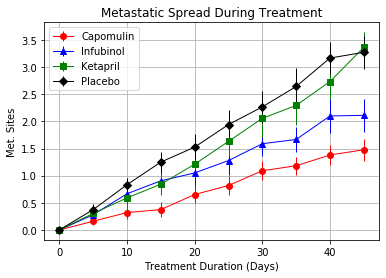

In [74]:
plt.errorbar(ms_mean_df_pivot.index, ms_mean_df_pivot["Capomulin"], 
                          yerr=ms_sem_df_pivot["Capomulin"], marker="o",color="red", linewidth=1, label="Capomulin")
plt.errorbar(ms_mean_df_pivot.index, ms_mean_df_pivot["Infubinol"], 
                          yerr=ms_sem_df_pivot["Infubinol"], marker="^",color="blue", linewidth=1, label="Infubinol")
plt.errorbar(ms_mean_df_pivot.index, ms_mean_df_pivot["Ketapril"], 
                         yerr=ms_sem_df_pivot["Ketapril"], marker="s",color="green", linewidth=1, label="Ketapril")
plt.errorbar(ms_mean_df_pivot.index, ms_mean_df_pivot["Placebo"], 
                        yerr=ms_sem_df_pivot["Placebo"], marker="D",color="black", linewidth=1, label="Placebo")


plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment") 
plt.legend(loc="best")
plt.grid(True)
plt.savefig("Metastatic Spread During Treatment")
plt.show()

## Survival Rates

In [75]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mc = combined_df[["Mouse ID","Drug Regimen", "Timepoint"]].groupby(["Drug Regimen", "Timepoint"])
mc_count = mc.count()
mc_count.head()

# Convert to DataFrame
mc_count_df = pd.DataFrame(mc_count).reset_index().rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mc_count_df.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [229]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mc_count_df_pivot = mc_count_df.pivot(index='Timepoint', columns='Drug Regimen', values='Mouse Count')

# Preview that Reformatting worked
mc_count_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


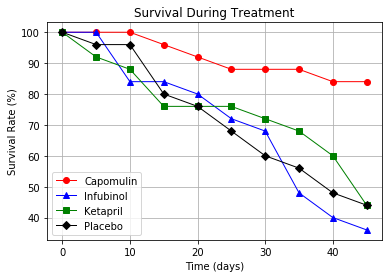

In [77]:
# Generate the Plot (Accounting for percentages)


plt.plot(mc_count_df_pivot.index, (mc_count_df_pivot["Capomulin"]/25)*100, marker="o",color="red", linewidth=1, label="Capomulin")
plt.plot(mc_count_df_pivot.index, (mc_count_df_pivot["Infubinol"]/25)*100, marker="^",color="blue", linewidth=1, label="Infubinol")
plt.plot(mc_count_df_pivot.index, (mc_count_df_pivot["Ketapril"]/25)*100, marker="s",color="green", linewidth=1, label="Ketapril")
plt.plot(mc_count_df_pivot.index, (mc_count_df_pivot["Placebo"]/25)*100, marker="D",color="black", linewidth=1, label="Placebo")


plt.legend(loc="best")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.grid(True)

# Save the Figure
plt.savefig("Survival During Treatment")
# Show the Figure
plt.show()


## Summary Bar Graph

In [91]:
# Calculate the percent changes for each drug
change = (mtv_mean_df_pivot.iloc[9,:] - mtv_mean_df_pivot.iloc[0,:]) / mtv_mean_df_pivot.iloc[0,:] * 100

# Display the data to confirm
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [150]:
# filter to just the changes we need
change_new = {
    change[0],
    change[2], 
    change[3],
    change[5]
}
change_new


{-19.475302667894173, 46.12347172785184, 51.29796048315153, 57.028794686606076}

In [151]:
# Store all Relevant Percent Changes into a Tuple

change_tuple = tuple(change_new)
change_tuple

(57.028794686606076, 51.29796048315153, -19.475302667894173, 46.12347172785184)

In [182]:

for item in change_tuple: 
    print(item)

57.028794686606076
51.29796048315153
-19.475302667894173
46.12347172785184


In [186]:
# Splice the data between passing and failing drugs


sliced = slice(2,3)
failing = change_tuple[sliced]
failing



(-19.475302667894173,)

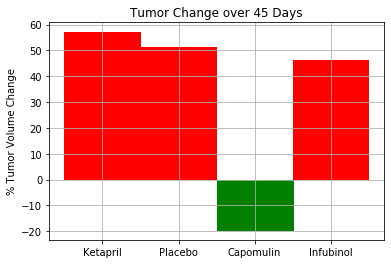

In [228]:
x = np.arange(4)
change_tuple

plt.title("Tumor Change over 45 Days")
plt.ylabel("% Tumor Volume Change")
barlist = plt.bar(x, change_tuple, color="red", width=1)
plt.grid(True)
barlist[2].set_color("green")
plt.xticks(x, ('Ketapril', 'Placebo', 'Capomulin', 'Infubinol'))
plt.show()


# plt.plot((len(change_tuple)), failing)

## Three conclusions from the data: 
1) Capomulin and Ramicane are the only 2 test drugs that caused the tumor to shrink over a 45 day period.

2) Ramicane worked the best for tumor shrinkage, shrinking the tumor on average by 22%. However, Ramicane lost more mice than Capomulin with only 20 remaining after testing ended vs. 21 for Capomulin. 

3) While taking Ketapril, tumors grew by 57% over 45 days which was the largest increase in growth of any of our drugs. 